<a href="https://colab.research.google.com/github/AlbertMdz/T-cnicas_Algor-tmicas/blob/master/Overlaping_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

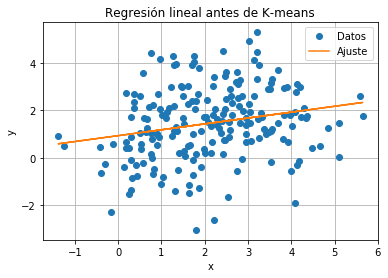

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



np.random.seed(5)

# initializing centers of the three clusters manually
 
centers = [[1, 1], [-1, -1], [1, -1]]


''' taking the parameters for the three clusters as initialization - following 
saome gaussian distribution '''

# Try playing with mean and variance values to see how well KMeans algo clusterst the data
mu1 = [1, 1]
sig1 = [ [1, 0], [0, 2] ]

mu2 = [3, 2]
sig2 = [ [1, 0], [0, 2] ]



''' sampling points (x,y) from three diff gaussian distributions '''

X1, y1 = np.random.multivariate_normal(mu1, sig1, 100).T
X2, y2 = np.random.multivariate_normal(mu2, sig2, 100).T


x = np.concatenate((X1, X2))
xverde= np.array(X1)
xazul= np.array(X2)
y = np.concatenate((y1, y2))
yverde= np.array(y1)
yazul= np.array(y2)

x= x.reshape(200,1)
xverde=xverde.reshape(100,1)
xazul=xazul.reshape(100,1)

y= y.reshape(200,1)
yverde=yverde.reshape(100,1)
yazul=yazul.reshape(100,1)


X = np.column_stack((x,y)) 
n=len(x)
x= np.array(x)
y= np.array(y)
sumx = sum(x)
sumy = sum(y)
sumx2 =sum(x*x)
sumy2=sum(y*y)
sumxy =sum(x*y)
promediox = sumx/n
promedioy = sumy/n
m= (sumx* sumy - n*sumxy)/(sumx**2 - n*sumx2)
b= promedioy - m* promediox
plt.plot(x,y, 'o', label='Datos' )
plt.plot(x, m*x +b, label='Ajuste')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión lineal antes de K-means')
plt.grid()
plt.legend()
plt.show()

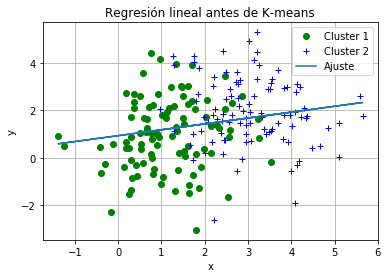

In [0]:
plt.plot(xverde,yverde, 'o',c='green' ,label='Cluster 1' )
plt.plot(xazul,yazul, '+',c='blue' ,label='Cluster 2' )
plt.plot(x, m*x +b, label='Ajuste')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión lineal antes de K-means')
plt.grid()
plt.legend()
plt.show()

In [0]:
sigmax= np.sqrt(sumx2/n - promediox**2)
sigmay= np.sqrt(sumy2/n - promedioy**2)
sigmaxy= sumxy/n - promediox*promedioy
w= (sigmaxy/ (sigmax*sigmay))**2
w

array([0.04762985])

0 ,
1 ,
1 ,
0 ,
0 ,
0 ,
0 ,
0 ,
1 ,
0 ,
0 ,
0 ,
1 ,
0 ,
0 ,
0 ,
0 ,
0 ,
1 ,
1 ,
0 ,
0 ,
1 ,
1 ,
0 ,
1 ,
0 ,
0 ,
1 ,
1 ,
0 ,
0 ,
0 ,
1 ,
0 ,
0 ,
1 ,
0 ,
1 ,
0 ,
1 ,
1 ,
1 ,
0 ,
0 ,
1 ,
0 ,
0 ,
0 ,
1 ,
1 ,
0 ,
1 ,
0 ,
0 ,
0 ,
1 ,
0 ,
1 ,
0 ,
1 ,
0 ,
0 ,
0 ,
0 ,
0 ,
0 ,
1 ,
1 ,
1 ,
1 ,
1 ,
0 ,
0 ,
0 ,
1 ,
0 ,
0 ,
1 ,
0 ,
0 ,
0 ,
0 ,
0 ,
0 ,
0 ,
1 ,
0 ,
0 ,
1 ,
0 ,
0 ,
0 ,
0 ,
0 ,
1 ,
1 ,
0 ,
0 ,
1 ,
1 ,
0 ,
1 ,
1 ,
1 ,
0 ,
1 ,
1 ,
1 ,
0 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
0 ,
0 ,
1 ,
1 ,
1 ,
0 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
0 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
0 ,
0 ,
0 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
0 ,
1 ,
1 ,
0 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
0 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
0 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
1 ,
0 ,
1 ,
1 ,
1 ,
1 ,
1 ,


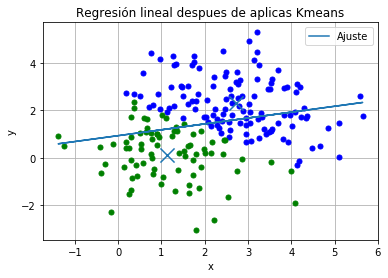

In [0]:
x= x.reshape(200)
y= y.reshape(200)
X= np.array(list(zip(x,y)))

kmeans= KMeans (n_clusters=2)
kmeans= kmeans.fit(X)
labels= kmeans.predict(X)
centroids= kmeans.cluster_centers_
colors=["g.", "b.","y","k"]

for i in range(len(X)):
  #print("Coordenada: ",X[i],"Label:", labels[i])
  print(labels[i],",")
  plt.plot(X[i][0],X[i][1], colors[labels[i]], markersize=10)
plt.scatter(centroids[:,0],centroids[:,1],marker="x",s=200,linewidths=5, zorder=10)
#plt.plot(xverde,yverde, '+',c='green' ,label='Cluster 1' )
#plt.plot(xazul,yazul, '+',c='blue' ,label='Cluster 2' )
plt.plot(x, m*x +b, label='Ajuste')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión lineal despues de aplicas Kmeans')
plt.grid()
plt.legend()
plt.show()

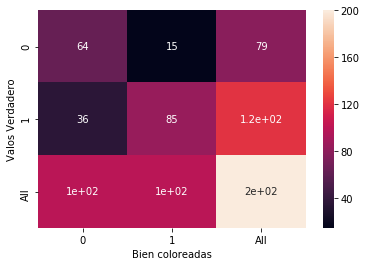

In [0]:
import pandas as pd
import seaborn as sn

data = {'y_Predicted': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,],
        'y_Actual':    [0 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 1 , 0 , 0 , 0 , 1 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 0 , 0 , 1 , 1 , 0 , 1 , 0 , 0 , 1 , 1 , 0 , 0 , 0 , 1 , 0 , 0 , 1 , 0 , 1 , 0 , 1 , 1 , 1 , 0 , 0 , 1 , 0 , 0 , 0 , 1 , 1 , 0 , 1 , 0 , 0 , 0 , 1 , 0 , 1 , 0 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 1 , 0 , 0 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 0 , 0 , 1 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 0 , 0 , 1 , 1 , 0 , 1 , 1 , 1 , 0 , 1 , 1 , 1 , 0 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 0 , 0 , 1 , 1 , 1 , 0 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 0 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 0 , 1 , 1 , 0 , 1 , 1 , 1 , 1 , 1 , 1 , 0 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 0 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 0 , 1 , 1 , 1 , 1 , 1]
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Valos Verdadero'], colnames=['Bien coloreadas'], margins = True)

sn.heatmap(confusion_matrix, annot=True)
